In [1]:
import numpy as np

### Life of ndarray

#### It's

nd array = blokc of memory + indexing scheme + data type descriptor

- raw data
- how to locate an element
- haow to interpret an element

```c
typedef struct PyArrayObject {
        PyObject_HEAD

        /* Block of memory */
        char *data;

        /* Data type descriptor */
        PyArray_Descr *descr;

        /* Indexing scheme */
        int nd;
        npy_intp *dimensions;
        npy_intp *strides;

        /* Other stuff */
        PyObject *base;
        int flags;
        PyObject *weakreflist;
} PyArrayObject;
```

#### Block of memory

In [3]:
x = np.array([1, 2, 3], dtype = np.int32)
x.data

In [4]:
str(x.data)

'<memory at 0x0000000005A2A4C8>'

In [5]:
x.__array_interface__['data'][0]

65332432

In [6]:
x.__array_interface__

{'data': (65332432, False),
 'descr': [('', '<i4')],
 'shape': (3,),
 'strides': None,
 'typestr': '<i4',
 'version': 3}

In [7]:
x = np.array([1, 2, 3, 4])
y = x[:-1]
x[0] = 9
y

array([9, 2, 3])

In [9]:
x = b'1234'
type(x)

bytes

In [10]:
y = np.frombuffer(x, dtype = np.int8)
y.data

In [11]:
y.base is x

True

In [12]:
y

array([49, 50, 51, 52], dtype=int8)

In [13]:
y.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  UPDATEIFCOPY : False

#### Data types

##### The desctiptor
- type:
    -int8, int16, float64, et al. (fixed size)
    - str, unicode, void (flexible size)
- itmesize: size of the data block
- fields: sub_dtypes, if it's a tructured data type
- shape: shape of the array, if it's a sub-array        

In [14]:
np.dtype(int).type

numpy.int32

In [15]:
np.dtype(int).itemsize

4

In [16]:
np.dtype(int).byteorder

'='

##### Example: reading `.wav` files

In [17]:
>>> wav_header_dtype = np.dtype([
...     ("chunk_id", (bytes, 4)), # flexible-sized scalar type, item size 4
...     ("chunk_size", "<u4"),    # little-endian unsigned 32-bit integer
...     ("format", "S4"),         # 4-byte string
...     ("fmt_id", "S4"),
...     ("fmt_size", "<u4"),
...     ("audio_fmt", "<u2"),     #
...     ("num_channels", "<u2"),  # .. more of the same ...
...     ("sample_rate", "<u4"),   #
...     ("byte_rate", "<u4"),
...     ("block_align", "<u2"),
...     ("bits_per_sample", "<u2"),
...     ("data_id", ("S1", (2, 2))), # sub-array, just for fun!
...     ("data_size", "u4"),
...     #
...     # the sound data itself cannot be represented here:
...     # it does not have a fixed size
...    ])

In [19]:
>>> wav_header_dtype['format']
>>> wav_header_dtype.fields   
>>> wav_header_dtype.fields['format']

(dtype('S4'), 8)

##### Casting and re_interpretation / views

###### Casting

In [28]:
x = np.array([1,2,3,4], dtype= np.float)
x

array([ 1.,  2.,  3.,  4.])

In [29]:
y = x.astype(np.int8)
y

array([1, 2, 3, 4], dtype=int8)

In [30]:
y + 1

array([2, 3, 4, 5], dtype=int8)

In [31]:
y + 256

array([257, 258, 259, 260], dtype=int16)

In [32]:
y + 256.0

array([ 257.,  258.,  259.,  260.])

In [33]:
y + np.array([256], dtype = np.int32)

array([257, 258, 259, 260])

###### Re-interpretation / viewing

In [36]:
x = np.array([1, 2, 3, 4], dtype = np.uint8)
x.dtype = "<i2"
x

array([ 513, 1027], dtype=int16)

In [37]:
0x0201, 0x0403

(513, 1027)

In [38]:
y = x.view('<i4')
y

array([67305985])

In [39]:
0x04030201

67305985

#### Indexing scheme: strides

#### Main point

In [40]:
x = np.array([[1, 2, 3], 
             [4, 5, 6],
             [7, 8, 9]], dtype = np.int8)
str(x.data)

'<memory at 0x0000000005A0EA68>'

In [41]:
x.strides

(3, 1)

In [42]:
byte_offset = 3*1 + 1*2
x.flat[byte_offset]

6

In [43]:
x[1, 2]

6

###### C and Fortran order

In [44]:
x = np.array([[1, 2, 3],
              [4, 5, 6]], dtype=np.int16, order='C')
x.strides

str(x.data)  

'<memory at 0x0000000005A0EA68>'

In [45]:
y = np.array(x, order='F')
y.strides

str(y.data)  

'<memory at 0x0000000005A0EA68>'

In [46]:
y = np.array([[1, 3], [2, 4]], dtype=np.uint8).transpose()
x = y.copy()

In [47]:
x.strides

y.strides

(1, 2)

In [49]:
str(x.data)  

str(y.data)  

'<memory at 0x0000000005A0EA68>'

###### Slicing with integers

In [51]:
x = np.array([1,2,3,4,5,6], dtype=np.int32)
y = x[::-1]
y

array([6, 5, 4, 3, 2, 1])

In [52]:
y.strides

(-4,)

In [54]:
y = x[:2]
y.__array_interface__['data'][0] - x.__array_interface__['data'][0]

0

In [56]:
x = np.zeros((10, 10, 10), dtype=np.float)
x.strides

(800, 80, 8)

In [57]:
x[::2, ::3, ::4].strides

(1600, 240, 32)

In [58]:
x = np.zeros((10, 10, 10), dtype=np.float)
x.strides

(800, 80, 8)

In [59]:
x.T.strides

(8, 80, 800)

In [60]:
a = np.arange(6, dtype=np.int8).reshape(3, 2)
b = a.T
b.strides

(1, 2)

In [61]:
str(a.data), b

('<memory at 0x0000000005A0EA68>', array([[0, 2, 4],
        [1, 3, 5]], dtype=int8))

In [62]:
c = b.reshape(3*2)
c

array([0, 2, 4, 1, 3, 5], dtype=int8)

##### Example: fake dimensions with strides

In [63]:
from numpy.lib.stride_tricks import as_strided
help(as_strided)

Help on function as_strided in module numpy.lib.stride_tricks:

as_strided(x, shape=None, strides=None, subok=False)
    Make an ndarray from the given array with the given shape and strides.



In [64]:
x = np.array([1, 2, 3, 4], dtype=np.int16)
as_strided(x, strides=(2*2, ), shape=(2, ))

array([1, 3], dtype=int16)

In [65]:
x[::2]

array([1, 3], dtype=int16)

##### Broadcasting

In [67]:
x = np.array([1, 2, 3, 4], dtype=np.int16)
x2 = as_strided(x, strides=(0, 1*2), shape=(3, 4))
x2

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]], dtype=int16)

In [70]:
y = np.array([5, 6, 7], dtype=np.int16)
y2 = as_strided(y, strides=(1*2, 0), shape=(3, 4))
y2

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]], dtype=int16)

In [71]:
x2 * y2

array([[ 5, 10, 15, 20],
       [ 6, 12, 18, 24],
       [ 7, 14, 21, 28]], dtype=int16)

In [73]:
x2.dot(y2.T)

array([[50, 60, 70],
       [50, 60, 70],
       [50, 60, 70]], dtype=int16)

In [74]:
x = np.array([1, 2, 3, 4], dtype=np.int16)
y = np.array([5, 6, 7], dtype=np.int16)
x[np.newaxis,:] * y[:,np.newaxis]

array([[ 5, 10, 15, 20],
       [ 6, 12, 18, 24],
       [ 7, 14, 21, 28]], dtype=int16)

##### More tricks: diagonals

In [76]:
x = np.arange(5*5*5*5).reshape(5, 5, 5, 5)
s = 0
for i in range(5):
    for j in range(5):
        s += x[j, i, j, i]
s

7800

In [79]:
y = as_strided(x, shape=(5, 5), 
               strides=((5*5*5 + 5)*x.itemsize,
                        (5*5 + 1)*x.itemsize))
s2 = y.sum()
assert s == s2

##### CPU cache effects

In [81]:
x = np.zeros((20000,))
y = np.zeros((20000*67,))[::67]
x.shape, y.shape

((20000,), (20000,))

In [82]:
%timeit x.sum()

The slowest run took 7.76 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 14.2 µs per loop


In [83]:
%timeit y.sum()

The slowest run took 120.97 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 53.7 µs per loop


In [84]:
x.strides, y.strides

((8,), (536,))

##### inplace operations(caveat emptor)

In [85]:
x = np.array([[1, 2], [3, 4]])
x -= x.transpose()
x  

array([[ 0, -1],
       [ 1,  0]])

In [86]:
y = np.array([[1, 2], [3, 4]])
y -= y.T.copy()
y


array([[ 0, -1],
       [ 1,  0]])

#### Findings in dessection
- memory block: may be shared, .base, .data
- data type descriptor: structured data, sub-arrays, byte order, casting, viewing, .astype(), .view()
- strided indexing: strides, C/F-order, slicing w/ integers, as_strided, broadcasting, stride tricks, diag, CPU cache coherence

### Universal functions

#### What they are?
- Ufunc performs and elementwise operation on all elements of an array.
- Automatically support: broadcasting, casting, ...
- The author of an ufunc only has to supply the elementwise operation, Numpy takes care of the rest.
- The elementwise operation needs to be implemented in C (or, e.g., Cython)

##### Parts of an Ufunc

- Provided by user
```C
void ufunc_loop(void **args, int *dimensions, int *steps, void *data)
{
    /*
     * int8 output = elementwise_function(int8 input_1, int8 input_2)
     *
     * This function must compute the ufunc for many values at once,
     * in the way shown below.
     */
    char *input_1 = (char*)args[0];
    char *input_2 = (char*)args[1];
    char *output = (char*)args[2];
    int i;

    for (i = 0; i < dimensions[0]; ++i) {
        *output = elementwise_function(*input_1, *input_2);
        input_1 += steps[0];
        input_2 += steps[1];
        output += steps[2];
    }
}
```

- The Numpy part, built by

``` c
char types[3]

types[0] = NPY_BYTE   /* type of first input arg */
types[1] = NPY_BYTE   /* type of second input arg */
types[2] = NPY_BYTE   /* type of third input arg */

PyObject *python_ufunc = PyUFunc_FromFuncAndData(
    ufunc_loop,
    NULL,
    types,
    1, /* ntypes */
    2, /* num_inputs */
    1, /* num_outputs */
    identity_element,
    name,
    docstring,
    unused)
```

##### Making it easier

Ufunc_type | work
--- | --- 
PyUfunc_f_f | float elementwise_func(float input_1)
PyUfunc_ff_f | float elementwise_func(float input_1, float input_2)
PyUfunc_d_d | double elementwise_func(double input_1)
PyUfunc_dd_d | double elementwise_func(double input_1, double input_2)
PyUfunc_D_D | elementwise_func(npy_cdouble *input, npy_cdouble* output)
PyUfunc_DD_D | elementwise_func(npy_cdouble *in1, npy_cdouble *in2, npy_cdouble* out)


#### Exercise: building an ufunc from scratch

#### Solution: building an ufunc from scratch
``` c
# The elementwise function
# ------------------------

cdef void mandel_single_point(double complex *z_in, 
                              double complex *c_in,
                              double complex *z_out) nogil:
    #
    # The Mandelbrot iteration
    #

    #
    # Some points of note:
    #
    # - It's *NOT* allowed to call any Python functions here.
    #
    #   The Ufunc loop runs with the Python Global Interpreter Lock released.
    #   Hence, the ``nogil``.
    #
    # - And so all local variables must be declared with ``cdef``
    #
    # - Note also that this function receives *pointers* to the data;
    #   the "traditional" solution to passing complex variables around
    #

    cdef double complex z = z_in[0]
    cdef double complex c = c_in[0]
    cdef int k  # the integer we use in the for loop

    # Straightforward iteration

    for k in range(100):
        z = z*z + c
        if z.real**2 + z.imag**2 > 1000:
            break

    # Return the answer for this point
    z_out[0] = z


# Boilerplate Cython definitions
#
# You don't really need to read this part, it just pulls in
# stuff from the Numpy C headers.
# ----------------------------------------------------------

cdef extern from "numpy/arrayobject.h":
    void import_array()
    ctypedef int npy_intp
    cdef enum NPY_TYPES:
        NPY_CDOUBLE

cdef extern from "numpy/ufuncobject.h":
    void import_ufunc()
    ctypedef void (*PyUFuncGenericFunction)(char**, npy_intp*, npy_intp*, void*)
    object PyUFunc_FromFuncAndData(PyUFuncGenericFunction* func, void** data,
        char* types, int ntypes, int nin, int nout,
        int identity, char* name, char* doc, int c)

    void PyUFunc_DD_D(char**, npy_intp*, npy_intp*, void*)


# Required module initialization
# ------------------------------

import_array()
import_ufunc()


# The actual ufunc declaration
# ----------------------------

cdef PyUFuncGenericFunction loop_func[1]
cdef char input_output_types[3]
cdef void *elementwise_funcs[1]

loop_func[0] = PyUFunc_DD_D

input_output_types[0] = NPY_CDOUBLE
input_output_types[1] = NPY_CDOUBLE
input_output_types[2] = NPY_CDOUBLE

elementwise_funcs[0] = <void*>mandel_single_point

mandel = PyUFunc_FromFuncAndData(
    loop_func,
    elementwise_funcs,
    input_output_types,
    1, # number of supported input types
    2, # number of input args
    1, # number of output args
    0, # `identity` element, never mind this
    "mandel", # function name
    "mandel(z, c) -> computes iterated z*z + c", # docstring
    0 # unused
    )
```


#### Generalized ufuncs

### Interoperability futures

#### Sharing multidimensional, typed data

#### The old buffer protocol

#### The old buffer protocol

#### Array interface protocol

### Array siblings: chararray, maskedarray, matrix

#### chararray: vectorized string operations

In [89]:
x = np.array(['a', '  bbb', '  ccc']).view(np.chararray)
x.lstrip(' ') 

chararray(['a', 'bbb', 'ccc'], 
      dtype='<U5')

In [90]:
x.upper()

chararray(['A', '  BBB', '  CCC'], 
      dtype='<U5')

#### masked_array missing data

In [92]:
x = np.array([1, 2, 3, -99, 5])
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx

masked_array(data = [1 2 3 -- 5],
             mask = [False False False  True False],
       fill_value = 999999)

In [93]:
mx.mean()

2.75

In [94]:
np.mean(mx)

2.75

In [95]:
mx[1] = 9
x

array([  1,   9,   3, -99,   5])

##### The mask

In [96]:
mx[1] = np.ma.masked
mx

masked_array(data = [1 -- 3 -- 5],
             mask = [False  True False  True False],
       fill_value = 999999)

In [97]:
mx[1] = 9
mx

masked_array(data = [1 9 3 -- 5],
             mask = [False False False  True False],
       fill_value = 999999)

In [98]:
x2 = mx.filled(-1)
x2

array([ 1,  9,  3, -1,  5])

##### Domain-aware functions

In [100]:
np.ma.log(np.array([1, 2, -1, -2, 3, -5]))

masked_array(data = [0.0 0.6931471805599453 -- -- 1.0986122886681098 --],
             mask = [False False  True  True False  True],
       fill_value = 1e+20)

In [101]:
data = np.loadtxt('data/populations.txt')
populations = np.ma.masked_array(data[:,1:])
year = data[:, 0]

bad_years = (((year >= 1903) & (year <= 1910))
           | ((year >= 1917) & (year <= 1918)))
# '&' means 'and' and '|' means 'or'
populations[bad_years, 0] = np.ma.masked
populations[bad_years, 1] = np.ma.masked

populations.mean(axis=0)

masked_array(data = [40472.72727272727 18627.272727272728 42400.0],
             mask = [False False False],
       fill_value = 1e+20)

In [102]:
populations.std(axis=0)

masked_array(data = [21087.656489006717 15625.799814240254 3322.5062255844787],
             mask = [False False False],
       fill_value = 1e+20)

In [103]:
%matplotlib inline

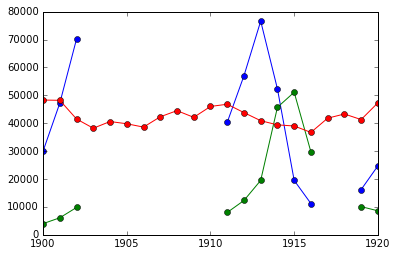

In [108]:
import matplotlib.pyplot as plt
plt.plot(year, populations, 'o-')
plt.show()

#### recarray: purely convenience

In [109]:
arr = np.array([('a', 1), ('b', 2)], dtype=[('x', 'S1'), ('y', int)])
arr2 = arr.view(np.recarray)
arr2.x  

array([b'a', b'b'], 
      dtype='|S1')

In [110]:
arr2.y

array([1, 2])

#### matrix: convenience?

In [111]:
np.matrix([[1, 0], [0, 1]]) * np.matrix([[1, 2], [3, 4]])

matrix([[1, 2],
        [3, 4]])

### Summary

- Anatomy of the ndarray: data, dtype, strides.
- Universal functions: elementwise operations, how to make new ones
- Ndarray subclasses
- Various buffer interfaces for integration with other tools
- Recent additions: PEP 3118, generalized ufuncs

### Contributing to Numpy/Scipy

[Contributing to Numpy/Scipy]

[Contributing to Numpy/Scipy]: http://www.euroscipy.org/talk/882 "Contributing to Numpy/Scipy"